<a href="https://colab.research.google.com/github/neohack22/IASD/blob/DeepLearning/Multiclass_Classification_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Exercise: Train a small dense network on the Reuters data

## Encoding the data

### error encoding the data

In [0]:
"""
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
"""

'\nx_train = vectorize_sequences(train_data)\nx_test = vectorize_sequences(test_data)\n'

### define a vectorizer

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

### missing numpy import: vectorize the data

In [0]:
"""
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
"""

'\nx_train = vectorize_sequences(train_data)\nx_test = vectorize_sequences(test_data)\n'

### import numpy for vectorizer

In [0]:
import numpy as np

### vectorize the data

# Multiclass Classification 1.1

You’ll work with the Reuters dataset, a set of short newswires and
their topics, published by Reuters in 1986. It’s a simple, widely used
toy dataset for text classification. There are 46 different topics; some
topics are more represented than others, but each topic has at least
10 examples in the training set.

In [0]:
from keras.datasets import reuters

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

## Train a small dense network on the Reuters data

### Encoding the data

#### NameError: name 'vectorize_sequences' is not defined

In [0]:
"""
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
"""

'\nx_train = vectorize_sequences(train_data)\nx_test = vectorize_sequences(test_data)\n'

#### SyntaxError: invalid syntax

In [0]:
"""
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros(len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
"""

'\ndef vectorize_sequences(sequences, dimension=10000):\n  results = np.zeros(len(sequences), dimension))\n  for i, sequence in enumerate(sequences):\n    results[i, sequence] = 1\n  return results\n'

#### def vectorize_sequences

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

#### Encoding the data 1.0

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Defining the network

#### SyntaxError: invalid syntax

In [0]:
"""
form keras import models
from keras import layers
"""

'\nform keras import models\nfrom keras import layers\n'

### Defining the network 1.1

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Defining the optimizer and the loss

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Defining a validation set

#### NameError: name 'x_train' is not defined

In [0]:
"""
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
"""

'\nx_val = x_train[:1000]\npartial_x_train = x_train[1000:]\ny_val = one_hot_train_labels[:1000]\npartial_y_train = one_hot_train_labels[1000:]\n'

### Encoding the data 1.1

#### NameError: name 'np' is not defined

In [0]:
"""
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
"""

'\nx_train = vectorize_sequences(train_data)\nx_test = vectorize_sequences(test_data)\n'

#### import numpy for vectorizer

In [0]:
import numpy as np

### Encoding the data 1.2

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Defining a validation set 1.1

In [0]:
x_val = x_test[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training with a validation set

In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, \
                    batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 165us/step - loss: 2.5361 - acc: 0.4754 - val_loss: 3.1182 - val_acc: 0.2270
Epoch 2/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.3711 - acc: 0.7182 - val_loss: 3.5878 - val_acc: 0.2190
Epoch 3/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.0190 - acc: 0.7826 - val_loss: 3.9709 - val_acc: 0.2110
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.8079 - acc: 0.8277 - val_loss: 4.2284 - val_acc: 0.2020
Epoch 5/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.6453 - acc: 0.8632 - val_loss: 4.4478 - val_acc: 0.2050
Epoch 6/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.5189 - acc: 0.8910 - val_loss: 4.7423 - val_acc: 0.2050
Epoch 7/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.4222 - acc: 0.9073 - val_loss: 4.9045 - val_acc: 0.2050


### Visualize the training

In [0]:
import matplotlib.pyplot as plt

In [0]:
"""
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
"""

"\nloss = history.history['loss']\nval_loss = history.history['val_loss']\nepochs = range(1, len(loss) + 1)\nplt.plot(epochs, loss, 'bo', label='Validation loss')\nplt.title('Training and validation loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n"

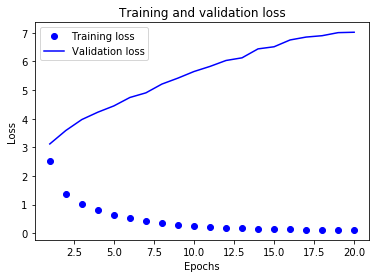

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Further experiments

#### Train on less epochs

In [0]:
history_1 = model.fit(partial_x_train, partial_y_train, epochs=2, \
                      batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/2
7982/7982 [==============================] - 1s 132us/step - loss: 0.1144 - acc: 0.9568 - val_loss: 7.2951 - val_acc: 0.2040
Epoch 2/2
7982/7982 [==============================] - 1s 130us/step - loss: 0.1123 - acc: 0.9558 - val_loss: 7.2236 - val_acc: 0.2110


##### AttributeError: 'History' object has no attribute 'history_1'

In [0]:
"""
loss_1 = history_1.history_1['loss']
val_loss_1 = history_1.history_1['val_loss_1']
epochs = range(1, len(loss_1) + 1)
plt.plot(epochs, loss_1, 'bo', label='Training loss 1')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss 1')
plt.title('Training and validation loss 1')
plt.xlabel('Epochs')
plt.ylabel('Loss 1')
plt.legend()
plt.show()
"""

"\nloss_1 = history_1.history_1['loss']\nval_loss_1 = history_1.history_1['val_loss_1']\nepochs = range(1, len(loss_1) + 1)\nplt.plot(epochs, loss_1, 'bo', label='Training loss 1')\nplt.plot(epochs, val_loss_1, 'b', label='Validation loss 1')\nplt.title('Training and validation loss 1')\nplt.xlabel('Epochs')\nplt.ylabel('Loss 1')\nplt.legend()\nplt.show()\n"

#### KeyError: 'val_loss_1

In [0]:
"""
loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss_1']
epochs = range(1, len(loss_1) + 1)
plt.plot(epochs, loss_1, 'bo', label='Training loss 1')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss 1')
plt.title('Training and validation loss 1')
plt.xlabel('Epochs')
plt.ylabel('Loss 1')
plt.legend()
plt.show()
"""

"\nloss_1 = history_1.history['loss']\nval_loss_1 = history_1.history['val_loss_1']\nepochs = range(1, len(loss_1) + 1)\nplt.plot(epochs, loss_1, 'bo', label='Training loss 1')\nplt.plot(epochs, val_loss_1, 'b', label='Validation loss 1')\nplt.title('Training and validation loss 1')\nplt.xlabel('Epochs')\nplt.ylabel('Loss 1')\nplt.legend()\nplt.show()\n"

#### Visualize the training 1.1

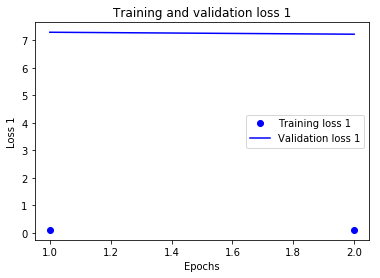

In [0]:
loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']
epochs = range(1, len(loss_1) + 1)
plt.plot(epochs, loss_1, 'bo', label='Training loss 1')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss 1')
plt.title('Training and validation loss 1')
plt.xlabel('Epochs')
plt.ylabel('Loss 1')
plt.legend()
plt.show()

#### Try using larger or smaller layers

##### 32 **units**

###### Defining the network 1.2

In [0]:
model_1 = models.Sequential()
model_1.add(layers.Dense(32, activation='relu', input_shape=(1000,)))
model_1.add(layers.Dense(32, activation='relu'))
model_1.add(layers.Dense(46, activation='softmax'))

###### Training with a validation set 1.1

SyntaxError: positional argument follows keyword argument

In [0]:
"""
history_1_1 = model.fit(partial_x_train, partial_y_train, epochs=2, \
                        batch_size=512, validation)
"""


'\nhistory_1_1 = model.fit(partial_x_train, partial_y_train, epochs=2,                         batch_size=512, validation)\n'

###### Training with a validation set 1.2

TypeError: Unrecognized keyword arguments

In [0]:
"""
history_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2, \
                          batch_size=512, validation=(x_val, y_val))
"""

'\nhistory_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2,                           batch_size=512, validation=(x_val, y_val))\n'

Defining the network 1.2

In [0]:
model_1 = models.Sequential()
model_1.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(32, activation='relu'))
model_1.add(layers.Dense(46, activation='softmax'))

###### TypeError: Unrecognized keyword arguments

In [0]:
"""
history_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2, \
                          batch_size=512, validation=(x_val, y_val))
"""

'\nhistory_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2,                           batch_size=512, validation=(x_val, y_val))\n'

Defining the network 1.3

RuntimeError: You must compile a model before training/testing

In [0]:
"""
history_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2, \
                          batch_size=512, validation_data=(x_val, y_val))
"""

'\nhistory_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2,                           batch_size=512, validation_data=(x_val, y_val))\n'

Defining the optimizer and the loss

In [0]:
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Defining the network 1.4

In [0]:
history_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2, \
                          batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/2
7982/7982 [==============================] - 1s 159us/step - loss: 3.1236 - acc: 0.3563 - val_loss: 2.9976 - val_acc: 0.2870
Epoch 2/2
7982/7982 [==============================] - 1s 105us/step - loss: 2.0725 - acc: 0.5786 - val_loss: 2.9446 - val_acc: 0.2590


SyntaxError: invalid syntax

In [0]:
"""
loss_1_1 = history_1_1.history['loss']
val_loss_1_1 = history_1_1.history['val_loss']
epochs_1_1 = range(1, len(loss_1_1)) + .1)
plt.plot(epochs_1_1, loss_1_1, 'bo', label='Training loss 1_1')
plt.title('Training and validation loss 1_1')
plt.xlabel('Epochs 1_1')
plt.ylabel('Loss 1_1')
plt.legend()
plt.show()
"""

"\nloss_1_1 = history_1_1.history['loss']\nval_loss_1_1 = history_1_1.history['val_loss']\nepochs_1_1 = range(1, len(loss_1_1)) + .1)\nplt.plot(epochs_1_1, loss_1_1, 'bo', label='Training loss 1_1')\nplt.title('Training and validation loss 1_1')\nplt.xlabel('Epochs 1_1')\nplt.ylabel('Loss 1_1')\nplt.legend()\nplt.show()\n"

Visualize the training

TypeError: 'float' object cannot be interpreted as an integer

In [0]:
"""
loss_1_1 = history_1_1.history['loss']
val_loss_1_1 = history_1_1.history['val_loss']
epochs_1_1 = range(1, len(loss_1_1) + .1)
plt.plot(epochs_1_1, loss_1_1, 'bo', label='Training loss 1_1')
plt.plot(epochs, val_loss_1_1, 'b', label='Validation loss 1_1')
plt.title('Training and validation loss 1_1')
plt.xlabel('Epochs 1_1')
plt.ylabel('Loss 1_1')
plt.legend()
plt.show()
"""

"\nloss_1_1 = history_1_1.history['loss']\nval_loss_1_1 = history_1_1.history['val_loss']\nepochs_1_1 = range(1, len(loss_1_1) + .1)\nplt.plot(epochs_1_1, loss_1_1, 'bo', label='Training loss 1_1')\nplt.plot(epochs, val_loss_1_1, 'b', label='Validation loss 1_1')\nplt.title('Training and validation loss 1_1')\nplt.xlabel('Epochs 1_1')\nplt.ylabel('Loss 1_1')\nplt.legend()\nplt.show()\n"

Visualize the training 1.2

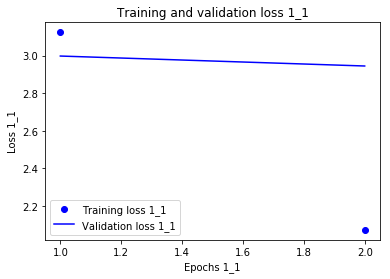

In [0]:
loss_1_1 = history_1_1.history['loss']
val_loss_1_1 = history_1_1.history['val_loss']
epochs = range(1, len(loss_1_1) + 1)
plt.plot(epochs, loss_1_1, 'bo', label='Training loss 1_1')
plt.plot(epochs, val_loss_1_1, 'b', label='Validation loss 1_1')
plt.title('Training and validation loss 1_1')
plt.xlabel('Epochs 1_1')
plt.ylabel('Loss 1_1')
plt.legend()
plt.show()

##### 128 units

In [0]:
"""
model_2 = models.Sequential()
model_2.add(layers.Dense(128, activation='relu', input_shape=(1000,)))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(46, activation='softmax'))
"""

"\nmodel_2 = models.Sequential()\nmodel_2.add(layers.Dense(128, activation='relu', input_shape=(1000,)))\nmodel_2.add(layers.Dense(128, activation='relu'))\nmodel_2.add(layers.Dense(46, activation='softmax'))\n"

In [0]:
model_2 = models.Sequential()
model_2.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(46, activation='softmax'))

###### Defining the network 1.4

###### TypeError: Unrecognized keyword arguments

In [0]:
"""
history_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2, \
                          batch_size=512, validation=(x_val, y_val))
"""

'\nhistory_1_1 = model_1.fit(partial_x_train, partial_y_train, epochs=2,                           batch_size=512, validation=(x_val, y_val))\n'

###### Defining the optimizer and the loss

In [0]:
model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

###### ValueError: Error when checking input

In [0]:
history_1_2 = model_2.fit(partial_x_train, partial_y_train, epochs=2, \
                          batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/2
7982/7982 [==============================] - 2s 272us/step - loss: 2.1639 - acc: 0.5699 - val_loss: 3.4946 - val_acc: 0.2200
Epoch 2/2
7982/7982 [==============================] - 2s 189us/step - loss: 1.0932 - acc: 0.7611 - val_loss: 4.0342 - val_acc: 0.2030


Defining the network 1.5

In [0]:
history_1_2 = model_2.fit(partial_x_train, partial_y_train, epochs=2, \
                          batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/2
7982/7982 [==============================] - 2s 197us/step - loss: 0.7633 - acc: 0.8393 - val_loss: 4.3788 - val_acc: 0.2040
Epoch 2/2
7982/7982 [==============================] - 2s 197us/step - loss: 0.5568 - acc: 0.8810 - val_loss: 4.7523 - val_acc: 0.2030


SyntaxError: invalid syntax

In [0]:
"""
loss_1_2 = history_1_2.history['loss']
val_loss_1_2 = history_1_2.history['val_loss']
epochs_1_2 = range(1, len(loss_1_2)) + .1)
plt.plot(epochs_1_2, loss_1_2, 'bo', label='Training loss 1_2')
plt.title('Training and validation loss 1_2')
plt.xlabel('Epochs 1_2')
plt.ylabel('Loss 1_2')
plt.Legend()
plt.show()
"""

"\nloss_1_2 = history_1_2.history['loss']\nval_loss_1_2 = history_1_2.history['val_loss']\nepochs_1_2 = range(1, len(loss_1_2)) + .1)\nplt.plot(epochs_1_2, loss_1_2, 'bo', label='Training loss 1_2')\nplt.title('Training and validation loss 1_2')\nplt.xlabel('Epochs 1_2')\nplt.ylabel('Loss 1_2')\nplt.Legend()\nplt.show()\n"

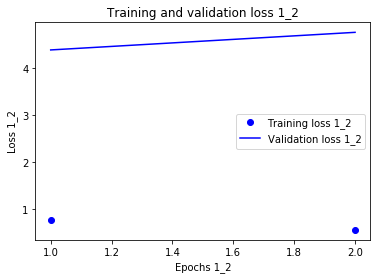

In [0]:
loss_1_2 = history_1_2.history['loss']
val_loss_1_2 = history_1_2.history['val_loss']
epochs = range(1, len(loss_1_2) + 1)
plt.plot(epochs, loss_1_2, 'bo', label='Training loss 1_2')
plt.plot(epochs, val_loss_1_2, 'b', label='Validation loss 1_2')
plt.title('Training and validation loss 1_2')
plt.xlabel('Epochs 1_2')
plt.ylabel('Loss 1_2')
plt.legend()
plt.show()